<a href="https://colab.research.google.com/github/berkaykarr/EmployeeManager.mvc/blob/master/Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the requriements

In [39]:
#import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import nltk
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BERKAY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BERKAY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Analysis

In [40]:
turkce_stop_words = [
    "ve", "bir", "bu", "de", "da", "ile", "için", "ama", "fakat", "ancak",
    "veya", "ki", "hem", "her", "şu", "o", "biz", "siz", "onlar", "çok", "az",
    "daha", "en", "gibi", "ise", "eğer", "çünkü", "ile", "mi", "mı", "mu", "mü",
    "şey", "bile", "ya", "ya da", "kadar", "sonra", "önce", "değil", "olarak"
]

In [41]:
#import datas
spam_df = pd.read_excel("TurkishSpam.xlsx", engine='openpyxl')


In [42]:
spam_df.sample(20)
#kodu test ettim

,Message,Category,Unnamed: 2
720,S.A;Devc 'ye : Bir hastamıza gebe başlatıım ve...,ham,NaN
4085,"Paketinizde ne kadar dakika, SMS, internet kal...",spam,NaN
4278,Ringa ile sizi arayanlari standart calma sesi ...,spam,NaN
4273,Rengarenk tum aksesuarlar %50 indirimle magaza...,spam,NaN
7,Bizler ÖSYMnin 10--11 Temmuz 2010 tarihinde y...,spam,NaN
4357,SAYIN AHMET DEMIRCI LOFT'TA ETIKETIN YARISI KA...,spam,NaN
5444,"Yilbasinda 60TL bonus!Market,benzin,giyim,elek...",spam,NaN
3776,"Money Dostu, tek seferde 15TL'lik bal, recel, ...",spam,NaN
251,Bizler 250.000'e yakın İktisadi ve İdari Bilim...,spam,NaN
658,istersen bana teamviewer id ve =FEifre ver. ba...,ham,NaN


In [43]:
spam_df['spam'] = spam_df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
#added a new coloumn for spam if the message is spam it will be 1 and if it is not it will be 0

In [44]:
#testing it if it is working
spam_df.sample(10)

,Message,Category,Unnamed: 2,spam
1680,Bide kendi odamdaki kirmizi duvari geri beyaza...,ham,NaN,0
2801,Hayƒ±rlƒ± cumalar..,ham,NaN,0
748,", , , , TTNET, , , , , , , , , , , , , , , ...",ham,NaN,0
1880,Bu firsat cebinize iyi gelecek! Saat 18:00'a k...,spam,NaN,1
713,Ruben Alejos Palomares shared the folder Car P...,ham,NaN,0
2046,Cok iyi bisey deil ttec marka ama cok fonksiyo...,ham,NaN,0
583,Selamünaleyküm Bence önceki gönderdiğim dos...,ham,NaN,0
2645,G√∂rd√ºm tm √∂pt√ºm :x,ham,NaN,0
689,serdar uğradığında görüşeceğim. ----- Origina...,ham,NaN,0
4781,Tamam 15 dk,ham,NaN,0


In [45]:
spam_df.shape

(5586, 4)

In [46]:
spam_df.columns

Index(['Message', 'Category', 'Unnamed: 2', 'spam'], dtype='object')

In [47]:
spam_df = spam_df.drop(columns=['Unnamed: 2'],axis='columns')
#Unnamed columunu kaldırdım


In [48]:
spam_df = spam_df.dropna()
#Null değerindeki veriye sahip olan satırları kaldırdım

In [49]:
spam_df.shape
#sütun kaldırdıktan sonra ve null değerindeki satırları kaldırdıktan sonra kaç tane satır ve sütun var diye kontrol ettim

(5575, 3)

In [50]:
spam_df.columns

Index(['Message', 'Category', 'spam'], dtype='object')

In [51]:
spam_df.sample(20)
#rastgele 20 örnek gösterdim.

,Message,Category,spam
3341,Kampanya: Philips supurge ve utulerde %43'e va...,spam,1
437,<html><div style='background-color:'><DIV clas...,ham,0
2370,Erken Rezervasyon otellerinde 1000TL ve √ºzeri...,spam,1
1395,Aslinda ta≈ü gibi kabartmali duvar kagitlarida...,ham,0
3014,Intel i5 islemcili HP dizustu bilgisayar 1.699...,spam,1
3824,"Mutlu yƒ±llar hocam, saƒülƒ±klƒ±, huzurlu yƒ±l...",ham,0
2060,Cumartesi yada pazar,ham,0
1883,"Bu firsat kacmaz! LG G3 32 GB 1399 TL, Samsung...",spam,1
4846,Tamam s√ºper o zaman Yarƒ±n g√∂r√º≈ü√ºr√ºz :),ham,0
4949,Tesekkur ederim hilal,ham,0


In [52]:
spam_df["Category"].value_counts()
#kategorilerin değerlerini çıkartıp kaç tane spam kaç tane normal mesaj olduğunu inceledim.

Category
spam    2865
ham     2710
Name: count, dtype: int64

Not a Spam Email Ratio: 49.0 %
Spam Email Ratio: 51.0 %


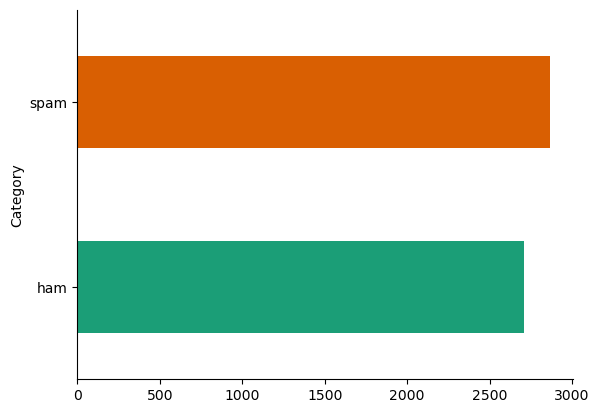

In [53]:
#Yüzdelik olarak spam ve normal mesajları yazdırdım ve renkli grafikte gösterdim.
print("Not a Spam Email Ratio:",round(len(spam_df[spam_df['spam']==0])/len(spam_df['spam']),2)*100,"%")
print("Spam Email Ratio:",round(len(spam_df[spam_df['spam']==1])/len(spam_df['spam']),2)*100,"%")
spam_df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:
spam_df.isnull().sum()

Message     0
Category    0
spam        0
dtype: int64

Feature Engineering

In [55]:
#yeni bir column ekledim ve bu sayede her mesajın uzunluğunu görebilirsiniz.
spam_df['length'] = spam_df['Message'].apply(len)
spam_df.sample(10)

,Message,Category,spam,length
2695,G√ºnaydƒ±n Melek bamya g√ºzel olmus.,ham,0,36
4907,Tatlƒ±m n√∂bete gidiyorum da Baktƒ±m ilana ama...,ham,0,101
1391,Aslan erkeƒüi ≈üimdi okudum da bana benzeyecek...,ham,0,51
4133,Paraf ile Hizlial.com'da 75 TL'ye varan ParafP...,spam,1,193
3270,Kampanya: CarrefourSA Kart ile sepetiniz TL pu...,spam,1,255
1701,Bilgisayar ekranƒ±ndan cekmi≈ü,ham,0,30
4101,Paraf 2 yasinda!5 Aralik¬íta Paraf POS¬íundan ...,spam,1,162
2617,Geziyorum dƒ±≈üarda surekli daha iyi geliyor e...,ham,0,60
1194,Ahmet bey mektubun var,ham,0,24
723,"Serdar sana bir mesaj gÃ¶nderdi.""sevbas""Bu Ã¶z...",ham,0,930


In [56]:
# I wanted to see totally how many lenghts my message datas
total_length = spam_df['length'].sum()
print("Total Length:", total_length)

Total Length: 2886589


In [57]:
# Mesajlarda kullanılan büyük harfleri küçülttüm.
spam_df["Message"] = spam_df["Message"].str.lower()
spam_df.sample(10)

,Message,Category,spam,length
4202,paraf'tan paraf ustu! 50-500 tl arasi market h...,spam,1,159
4660,s√∂yledƒ±m ya tecrube konu≈ümuyor,ham,0,33
2675,gunun yorgunlugunu bizimle atmak istermisiniz?...,spam,1,159
729,<html>\n<head>\n<title>markafoni</title>\n<met...,ham,0,12488
4047,ooooo ma≈üallah duygulandƒ±m valla karde≈ü ≈üi...,ham,0,223
4146,paraf ile samsung'da pesin fiyatina 9 taksit f...,spam,1,168
2736,haftanin ekstra indirimi!cift kisilik yatak or...,spam,1,160
5560,zehra yardƒ±m edeck bi≈üey varmƒ± diye soruyo,ham,0,46
3140,ƒ∞yi halldersiniz ya;) iyi bi plan yapƒ±n yete...,ham,0,50
3861,nasip deƒüilmi≈ü,ham,0,16


Feature Extraction & Modelling

In [58]:
#create train/test split
x_train, x_test, y_train, y_test = train_test_split(spam_df['Message'], spam_df['spam'], test_size=0.25)

# transform the text data to feature vectors that can be used as an input to the logictic regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words=turkce_stop_words, lowercase=True) # Changed 'True' to True

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert y datas to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')


X_train_vec = feature_extraction.fit_transform(x_train)
joblib.dump(feature_extraction, "count_vectorizer.pkl")

model = LogisticRegression()
model.fit(x_train_features, y_train)
joblib.dump(model, "logistic_model.pkl")


['logistic_model.pkl']

In [59]:
print(x_train_features)

  (0, 14314)	0.40326964314389685
  (0, 28872)	0.5733831206199758
  (0, 37213)	0.5733831206199758
  (0, 16330)	0.42407215057675135
  (1, 9127)	0.17995430941726778
  (1, 7005)	0.2551860601172109
  (1, 19857)	0.2717085380043976
  (1, 9897)	0.30391976450050073
  (1, 13792)	0.2111465098735913
  (1, 16204)	0.30391976450050073
  (1, 33758)	0.30391976450050073
  (1, 7883)	0.14987427704617295
  (1, 12469)	0.2717085380043976
  (1, 28746)	0.2717085380043976
  (1, 12464)	0.30391976450050073
  (1, 23096)	0.30391976450050073
  (1, 346)	0.14815911069757404
  (1, 39725)	0.21513045931664956
  (1, 39037)	0.28966606970777337
  (2, 14664)	0.35248623536058565
  (2, 39832)	0.6101186485920534
  (2, 41819)	0.6101186485920534
  (2, 32648)	0.3623036339339349
  (3, 26346)	0.4546200833153259
  (3, 40990)	0.48466645071727393
  :	:
  (4180, 35095)	0.03175288575822588
  (4180, 15842)	0.033221898662384515
  (4180, 35782)	0.029658248994795567
  (4180, 13504)	0.037414622208033675
  (4180, 16468)	0.029073305069363092
  

In [60]:
print(x_train)

2366                erken olsaydƒ± daha uygundu fiyatlar?
1971    buyuk baskan htc chacha ekran filmi sorucaktin...
2434                        evet √∂yleymi≈ü √ñzledim seni
843               men√ºye girsem g√∂r√ºn√ºr m√º acaba ?? 
279     tekyaz&nbsp;uyelik bilgilerinizizinsiz gonderi...
                              ...                        
1784                bize gelmez abi bunlar. sagol yinede.
1373    arƒ±yorum ak≈üama.. tayt da sanƒ±rƒ±m 40 tl dir,)
5520                                      yunus napƒ±on??
3974                                  ok, iyi tatiller :)
300     ------- 2012 t=dcrk=ddye =de=ddrket rehber=dd ...
Name: Message, Length: 4181, dtype: object


In [61]:
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(x_train_features, y_train)

RandomForestClassifier()

In [62]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(x_train_features, y_train)

MultinomialNB()

In [63]:
# SVM Model
svm_model = SVC()
svm_model.fit(x_train_features, y_train)

SVC()

Evulating the Trained Model

In [64]:
#Logistic Regression training
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print("Accuracy for Logistic Regression (Training) : ",accuracy_on_training_data)

Accuracy for Logistic Regression (Training) :  0.9863668978713227


In [65]:
#Logistic Regression testing
prediction_on_testing_data = model.predict(x_test_features)
accuracy_on_testing_data = accuracy_score(y_test, prediction_on_testing_data)
print("Accuracy for Logistic Regression (Testing) : ",accuracy_on_testing_data)

Accuracy for Logistic Regression (Testing) :  0.9727403156384505


In [66]:
#Random Forest training
rf_train_pred = rf_model.predict(x_train_features)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
print("Accuracy for Random Forest (Training):", rf_train_accuracy)

Accuracy for Random Forest (Training): 1.0


In [67]:
#Random Forest testing
rf_test_pred = rf_model.predict(x_test_features)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
print("Accuracy for Random Forest (Testing):", rf_test_accuracy)

Accuracy for Random Forest (Testing): 0.9777618364418939


In [68]:
# Naive Bayes training
nb_train_pred = nb_model.predict(x_train_features)
nb_train_accuracy = accuracy_score(y_train, nb_train_pred)
print("Accuracy for Naive Bayes (Training):", nb_train_accuracy)


Accuracy for Naive Bayes (Training): 0.9921071513991868


In [69]:
# Naive Bayes testing
nb_test_pred = nb_model.predict(x_test_features)
nb_test_accuracy = accuracy_score(y_test, nb_test_pred)
print("Accuracy for Naive Bayes (Testing):", nb_test_accuracy)

Accuracy for Naive Bayes (Testing): 0.960545193687231


In [70]:
# SVM training
svm_train_pred = svm_model.predict(x_train_features)
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
print("Accuracy for SVM (Training):", svm_train_accuracy)



Accuracy for SVM (Training): 0.9995216455393446


In [71]:
# SVM testing
svm_test_pred = svm_model.predict(x_test_features)
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
print("Accuracy for SVM (Testing):", svm_test_accuracy)

Accuracy for SVM (Testing): 0.9784791965566715


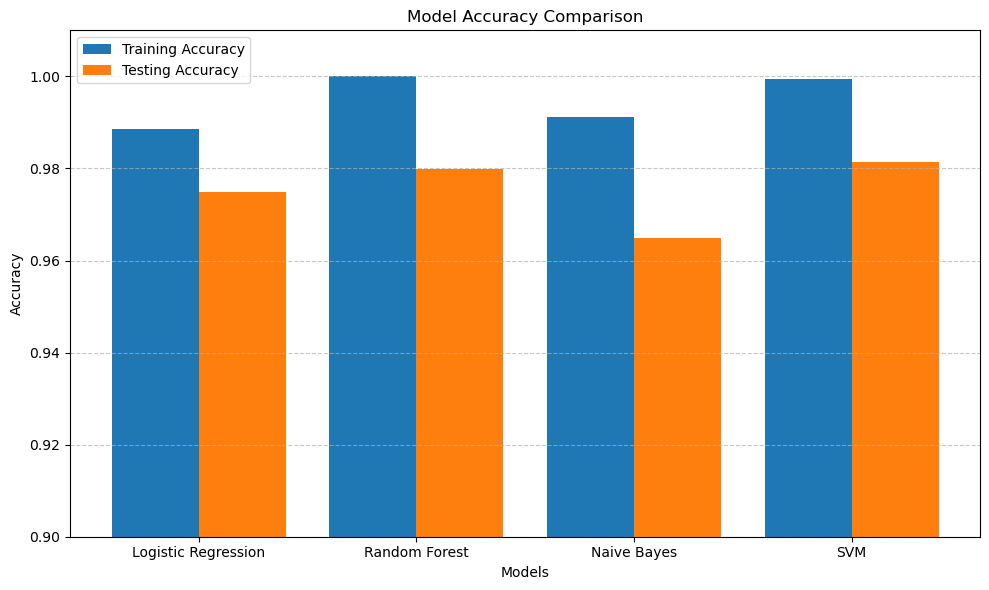

In [72]:
# Define model names and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
training_accuracies = [0.9885, 1.0, 0.9911, 0.9995]  # Replace with your actual training accuracies
testing_accuracies = [0.9748, 0.9799, 0.9648, 0.9813]  # Replace with your actual testing accuracies

# Create a bar chart for accuracies
x = range(len(models))  # x positions for bars
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.bar(x, training_accuracies, width=0.4, label='Training Accuracy', align='center')

# Plot testing accuracies
plt.bar([pos + 0.4 for pos in x], testing_accuracies, width=0.4, label='Testing Accuracy', align='center')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks([pos + 0.2 for pos in x], models)  # Adjust x-ticks to match bar centers
plt.ylim([0.9, 1.01])  # Set y-axis limits (adjust as needed)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [73]:
#Building a Prediction System

def predict(input_mail):
    input_data_features = feature_extraction.transform([input_mail])
    prediction = rf_model.predict(input_data_features)

    if prediction[0] == 1:
        print("Spam")
    else:
        print("Not Spam")

In [74]:
# testing the previous function
example_spam = "Sayın Yetklili ;En fazla mezun veren bölümlerden olan muhasebe bölümü çin daha çok kadro istiyoruz.Her birimiz Mali Müşavir kontrolünde staj tamamladik Bilgisayar kullanımı ve pratiklik konusunda gereken tecrübeye sahibiz.Kurumunuzun talep ettigi personel özelliklerin taşıdığımızı ve muhasebe bölümü olarak;gerek bilgisayar kullanım gerekse mali konular-vergi mevzuat olsun yeterli bilgi ve donanıma sahip mezunlar olduğumuzu bildirmek isteriz.Haziran ataması için kadro talebinizde bunlarıda göz önününde bulundurmanizi rica ederiz.3173 Önlisans Muhasebe Mezunları.."
example_notSpam = "seni çok seviyorum arkadaşım DOSTUM :)))Kuşlar gibi uçmAyı, balıklar gibi yüzmeyi öğrendik ama basit bir sanatı unuttuk. İNsAN gibi YAşamAyı biliYOr musun bu hafta dünYA dostlar haftası bu mesajı sevdiğin doslarına gönder eğer BEN de SENin YAkın arkadaşınsam dostunsam banada Yolla Bunu arkadaşlarına gönder BAkalım kaç Cvp geleCek eğer 7 den fazlAysa çOOKKk sevilen birisisin demektir."


In [75]:
predict(example_spam)


Spam


In [76]:
predict(example_notSpam)

Not Spam
